<a href="https://colab.research.google.com/github/ntzo-ai/EKPA-exams/blob/main/IDS_exam_3595-c1-u1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
#εγκατάσταση πακέτου tensorflow (hhttps://www.tensorflow.org/)
!pip install tensorflow
#εγκατάσταση πακέτου scikit-learn (https://scikit-learn.org/)
!pip install scikit-learn

In [70]:
#εισαγωγή βιβλιοθηκών - πακέτων
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
#from models import models_ddos

In [71]:
epochs = 100
nclass = 12

In [72]:
filename='https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/pcap_data.csv'
trainfile = pd.read_csv(filename)

In [73]:
X = trainfile.drop('target', axis=1).values
y = trainfile['target'].values

In [74]:
# preview data
trainfile

,Avg_syn_flag,Avg_urg_flag,Avg_fin_flag,Avg_ack_flag,Avg_psh_flag,Avg_rst_flag,Avg_DNS_pkt,Avg_TCP_pkt,Avg_UDP_pkt,Avg_ICMP_pkt,...,Min_pkts_lenght,Max_pkts_lenght,StDev_pkts_lenght,Avg_small_payload_pkt,Avg_payload,Min_payload,Max_payload,StDev_payload,Avg_DNS_over_TCP,target
0,-0.230455,4.523595,-1.276876,0.814947,-0.016410,-2.995087,1.063889,-2.371085,-2.840079,-0.283463,...,3.665958,-5.104394,0.690436,-1.584535,-2.282169,-6.064334,-0.756736,-1.488713,0.694093,2.0
1,-2.088776,2.387204,0.338205,1.419440,0.114833,0.913599,0.847367,-0.008734,-1.058475,0.342997,...,9.115390,-1.441248,1.710273,-0.274751,0.349761,8.602419,0.337548,0.362154,1.193261,0.0
2,-0.043220,3.578791,-1.073984,0.313930,-1.774397,-1.006298,0.929811,-3.432328,-1.932374,0.318437,...,-0.061857,-1.210975,0.435881,1.494576,0.074463,-5.532110,-0.088565,0.702886,0.104589,2.0
3,0.065305,3.761012,1.174174,0.761965,0.857883,-0.597540,-0.022305,1.695764,3.305753,0.792997,...,0.742680,-1.267473,-0.327164,0.188910,-0.122022,2.977927,-0.472563,1.779231,-0.058810,1.0
4,3.875263,1.385111,-2.633112,-0.545981,-1.570862,-3.460744,-1.882090,-2.115882,-2.954608,0.986303,...,2.235826,-0.848212,-0.320711,-1.145686,1.356040,-5.251642,0.787477,1.194117,3.840521,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14962,-3.192606,-1.159784,-0.386309,-0.105074,-0.107793,-0.540932,-0.485289,2.149890,-0.554747,-0.135449,...,7.936132,4.298986,0.116460,1.734781,0.577618,1.044769,0.465201,-0.093720,-2.138540,2.0
14963,-7.199283,4.577420,-1.613215,-0.015272,1.073862,-3.216205,-0.116166,-2.068878,-3.190195,-0.399831,...,18.453197,-2.415395,0.371743,0.666308,0.721392,7.164678,-3.207508,1.898327,-4.891586,0.0
14964,-0.007487,-0.180756,0.784125,1.721070,-0.533631,4.626391,-0.525302,-0.375373,-0.774585,-0.545721,...,1.046151,0.321264,0.352068,0.626728,-1.726936,3.406459,1.001524,-1.691021,-0.158612,2.0
14965,1.445870,2.772480,-1.270662,-0.782050,-1.234697,-1.643252,-0.323688,1.084773,-1.915505,-1.512685,...,3.998477,-1.506464,1.351880,-0.888374,0.556023,-1.140645,-1.716910,3.324111,-1.771521,1.0


In [75]:
trainfile.columns

Index(['Avg_syn_flag', 'Avg_urg_flag', 'Avg_fin_flag', 'Avg_ack_flag',
       'Avg_psh_flag', 'Avg_rst_flag', 'Avg_DNS_pkt', 'Avg_TCP_pkt',
       'Avg_UDP_pkt', 'Avg_ICMP_pkt', 'Duration_window_flow', 'Avg_delta_time',
       'Min_delta_time', 'Max_delta_time', 'StDev_delta_time',
       'Avg_pkts_lenght', 'Min_pkts_lenght', 'Max_pkts_lenght',
       'StDev_pkts_lenght', 'Avg_small_payload_pkt', 'Avg_payload',
       'Min_payload', 'Max_payload', 'StDev_payload', 'Avg_DNS_over_TCP',
       'target'],
      dtype='object')

In [76]:
data = pd.DataFrame(trainfile).to_numpy()

In [77]:
data

array([[-0.2304548 ,  4.52359537, -1.27687628, ..., -1.48871278,
         0.69409321,  2.        ],
       [-2.08877556,  2.38720365,  0.3382052 , ...,  0.36215406,
         1.19326143,  0.        ],
       [-0.0432197 ,  3.57879131, -1.07398432, ...,  0.70288575,
         0.10458913,  2.        ],
       ...,
       [-0.00748687, -0.18075621,  0.78412483, ..., -1.69102071,
        -0.15861199,  2.        ],
       [ 1.44587035,  2.77248036, -1.27066236, ...,  3.32411067,
        -1.77152055,  1.        ],
       [-0.63876374, -6.27596586,  0.75669008, ...,  0.1138326 ,
         1.51020413,  2.        ]])

In [78]:
data=data[ data[:,25] != 'DrDoS_LDAP' ]

In [79]:
data

array([[-0.2304548 ,  4.52359537, -1.27687628, ..., -1.48871278,
         0.69409321,  2.        ],
       [-2.08877556,  2.38720365,  0.3382052 , ...,  0.36215406,
         1.19326143,  0.        ],
       [-0.0432197 ,  3.57879131, -1.07398432, ...,  0.70288575,
         0.10458913,  2.        ],
       ...,
       [-0.00748687, -0.18075621,  0.78412483, ..., -1.69102071,
        -0.15861199,  2.        ],
       [ 1.44587035,  2.77248036, -1.27066236, ...,  3.32411067,
        -1.77152055,  1.        ],
       [-0.63876374, -6.27596586,  0.75669008, ...,  0.1138326 ,
         1.51020413,  2.        ]])

In [80]:
np.random.shuffle(data)

In [81]:
# MIN-MAX normalization
#data=data[:,inx_sel]
dmin = data.min(axis=0)
dmax = data.max(axis=0)
data=(data-dmin)/(dmax-dmin)

In [82]:
labels = list(trainfile.columns)
labels

['Avg_syn_flag',
 'Avg_urg_flag',
 'Avg_fin_flag',
 'Avg_ack_flag',
 'Avg_psh_flag',
 'Avg_rst_flag',
 'Avg_DNS_pkt',
 'Avg_TCP_pkt',
 'Avg_UDP_pkt',
 'Avg_ICMP_pkt',
 'Duration_window_flow',
 'Avg_delta_time',
 'Min_delta_time',
 'Max_delta_time',
 'StDev_delta_time',
 'Avg_pkts_lenght',
 'Min_pkts_lenght',
 'Max_pkts_lenght',
 'StDev_pkts_lenght',
 'Avg_small_payload_pkt',
 'Avg_payload',
 'Min_payload',
 'Max_payload',
 'StDev_payload',
 'Avg_DNS_over_TCP',
 'target']

In [83]:
# Test data 20%
train_data, test_data, train_label, test_label = train_test_split(X, y, test_size=0.20)


In [84]:
# Train 70%, Validation%10
train_data, val_data, train_label, val_label = train_test_split(train_data, train_label, test_size=0.125, stratify=train_label)

In [85]:
#συνάρτηση δημιουργίας και εκπαίδευσης νευρωνικού δικτύου
def create_and_train_model(input_dim):
    model = Sequential()
    model.add(Dense(256, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [86]:
model = create_and_train_model(train_data.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
# εισαγωγή δεδομένων
#train_data, train_labelp, val_data, val_labelp, test_data, test_labelp = loadDataset()
train_labelp = train_label.astype('int32')
val_labelp = val_label.astype('int32')
test_labelp = test_label.astype('int32')


In [88]:
# to_categorical
train_label = to_categorical(train_labelp, nclass)
val_label   = to_categorical(val_labelp,   nclass)
test_label  = to_categorical(test_labelp,  nclass)


In [89]:
print('train_data.shape=', train_data.shape)
print('test_data.shape=',  test_data.shape)
print('test_data.shape=',  val_data.shape)


train_data.shape= (10476, 25)
test_data.shape= (2994, 25)
test_data.shape= (1497, 25)


In [90]:
#get the number of features
inshape=train_data.shape[1]


In [91]:
# Class balancing weights
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(
                                                      train_labelp),
                                                  y=train_labelp)


In [92]:
class_weights = {i: class_weights[i] for i in range(len(class_weights))}


In [93]:
# -- CALLBACKS -----------------------------------------------------------------
earlyStopping = EarlyStopping(monitor='val_loss',
                              patience=30,
                              verbose=0,
                              mode='min')


In [110]:
model = Sequential()
model.add(Dense(256, input_dim=inshape, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='relu'))
#model.add(Dense(3, activation='softmax'))
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [67]:
#modelCheckPoint = ModelCheckpoint('./savemodels/model5class.weights.{epoch:03d}-{val_acc:.4f}.hdf5',
#                                  save_best_only=True,
#                                  monitor='val_acc',
#                                  mode='max')

# reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss',
#                                   factor=0.1,
#                                   patience=7,
#                                   verbose=1,
#                                   epsilon=1e-4,
#                                   mode='min')


In [106]:
# -- Baseline models-----------------------------------------------------------

# -- Conv1d
#model=models_ddos.model_conv1D(lr=1e-4,N=64,inshape=inshape)
# -- Dense
# model=models_ddos.model_dense(lr=1e-4,N=64,inshape=inshape)
# -- LSTM
# model=models_ddos.model_lstm(lr=1e-4,N=64,inshape=inshape)


In [111]:
model.summary()
# -----------------------------------------------------------------------------
# print model to an image file
# dot_img_file = 'model1.png'
# plot_model(model, to_file=dot_img_file, show_shapes=True)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 256)                 │           6,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,100 (160.55 KB)

 Trainable params: 41,100 (160.55 KB)

 Non-trainable params: 0 (0.00 B)

In [112]:
# -- TRAIN MODEL --------------------------------------------------------------
history = model.fit(train_data,
                    train_label,
                    shuffle=True,
                    epochs=epochs,
                    batch_size=256,  # 256,#128,#32, 64
                    # validation_data=validation_generator,
                    # validation_split=0.2,
                    # validation_data=(val_data,val_label),
                    validation_data=(val_data, val_label),
                    #callbacks=[earlyStopping],
                    class_weight=class_weights
                    #workers=3
                    )


Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3967 - loss: 2.9360 - val_accuracy: 0.7902 - val_loss: 0.8763
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6495 - loss: 0.9280 - val_accuracy: 0.8457 - val_loss: 0.7003
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7432 - loss: 0.8835 - val_accuracy: 0.8731 - val_loss: 0.6997
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7812 - loss: 0.9422 - val_accuracy: 0.8657 - val_loss: 0.6943
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7952 - loss: 0.8931 - val_accuracy: 0.8771 - val_loss: 0.6732
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8045 - loss: 0.8984 - val_accuracy: 0.8851 - val_loss: 0.6650
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8250 - loss: 0.8339 - val_accuracy: 0.8884 - val_loss: 0.6726
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8298 - loss: 0.8674 - val_accuracy: 0.8824 - 

In [115]:
# --Confusion matrix ----------------------------------------------------------
print('TEST DATA-Confusion matrix:')
pred = model.predict(test_data)
pred_y = pred.argmax(axis=-1)

cm = confusion_matrix(test_labelp.astype('int32'), pred_y)
print(cm)

print('Accuracy ratios for each class')
print('WebDDoS      =', cm[0, 0]/np.sum(cm[0, :]))
print('BENIGN       =', cm[1, 1]/np.sum(cm[1, :]))
print('UDP-lag      =', cm[2, 2]/np.sum(cm[2, :]))
#print('DrDoS_NTP    =', cm[3, 3]/np.sum(cm[3, :]))
#print('Syn          =', cm[4, 4]/np.sum(cm[4, :]))
#print('DrDoS_SSDP   =', cm[5, 5]/np.sum(cm[5, :]))
#print('DrDoS_UDP    =', cm[6, 6]/np.sum(cm[6, :]))
#print('DrDoS_NetBIOS=', cm[7, 7]/np.sum(cm[7, :]))
#print('DrDoS_MSSQL  =', cm[8, 8]/np.sum(cm[8, :]))
#print('DrDoS_SNMP   =', cm[9, 9]/np.sum(cm[9, :]))
#print('TFTP         =', cm[10,10]/np.sum(cm[10, :]))
#print('DrDoS_DNS    =', cm[11,11]/np.sum(cm[11, :]))


TEST DATA-Confusion matrix:
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[907  55  69]
 [ 54 886  36]
 [ 60  31 896]]
Accuracy ratios for each class
WebDDoS      = 0.8797284190106692
BENIGN       = 0.9077868852459017
UDP-lag      = 0.9078014184397163


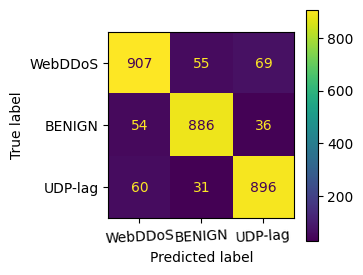

In [120]:
# -- Confusion matrix plot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
label=np.array(["WebDDoS","BENIGN","UDP-lag"])

cmo = ConfusionMatrixDisplay(cm,display_labels=label)
fig, ax = plt.subplots(figsize=(3,3))
cmo.plot(ax=ax, xticks_rotation=3)


In [123]:
history.history

{'accuracy': [0.5069683194160461,
  0.6753531694412231,
  0.754963755607605,
  0.7860824465751648,
  0.8011645674705505,
  0.8132874965667725,
  0.8258877396583557,
  0.831615149974823,
  0.8308514952659607,
  0.8208285570144653,
  0.830278754234314,
  0.8324742317199707,
  0.8390607237815857,
  0.839824378490448,
  0.8453608155250549,
  0.8449789881706238,
  0.8511836528778076,
  0.8507063984870911,
  0.8580564856529236,
  0.8534746170043945,
  0.8576746582984924,
  0.8590110540390015,
  0.8576746582984924,
  0.8647384643554688,
  0.8593928813934326,
  0.8643566370010376,
  0.8623520135879517,
  0.8627338409423828,
  0.8691294193267822,
  0.8654066324234009,
  0.8712294697761536,
  0.8691294193267822,
  0.8669339418411255,
  0.868079423904419,
  0.8749522566795349,
  0.869702160358429,
  0.8743795156478882,
  0.8758113980293274,
  0.8714203834533691,
  0.8668385148048401,
  0.8602520227432251,
  0.8670294284820557,
  0.8669339418411255,
  0.8704658150672913,
  0.872661292552948,
  0.8

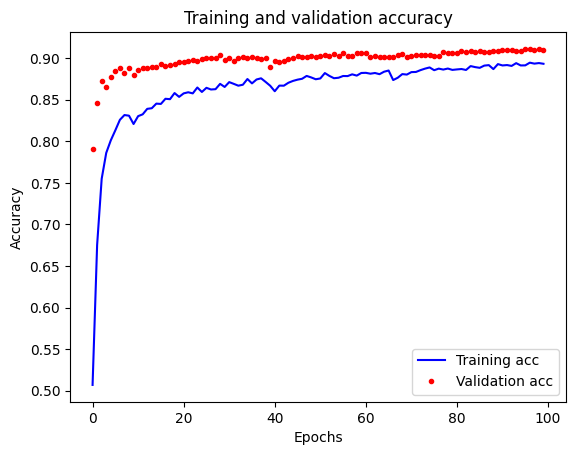

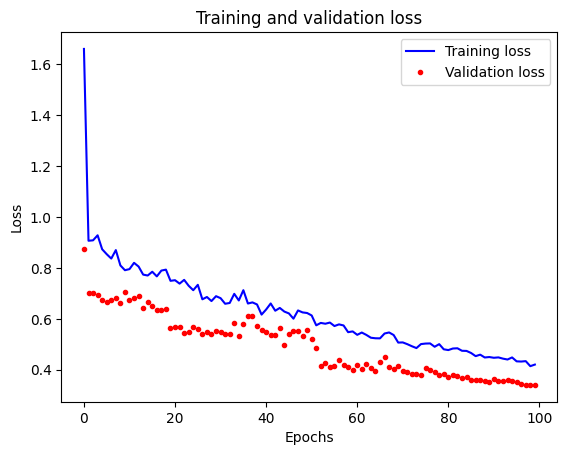

In [126]:
# Plot training and validation accurry and loss graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

np.save('historydata.npy',[acc,val_acc,loss,val_loss])
[acc, val_acc, loss, val_loss] = np.load('historydata.npy')

plt.figure()
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
